In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

sns.set_style("whitegrid")

In [2]:
DATA_PATH = "../../data/processed/newtons_second_law_cleaned_dataset.csv"
MODEL_PATH = "../../models/newtons_law_regression_model.pkl"
FORMULA_PATH = "../../results/formulas/newtons_law_symbolic_expression.txt"


if not os.path.exists(DATA_PATH):
    raise FileNotFoundError("Processed dataset not found.")

if not os.path.exists(MODEL_PATH):
    raise FileNotFoundError("Trained regression model not found.")

if not os.path.exists(FORMULA_PATH):
    raise FileNotFoundError("Symbolic regression formula not found.")

In [3]:
df = pd.read_csv(DATA_PATH)
reg_model = joblib.load(MODEL_PATH)

with open(FORMULA_PATH, "r") as f:
    symbolic_equation = f.read()

In [4]:
features = ["Mass_kg", "Acceleration_ms2", "mass_x_acceleration"]
target = "Force_N"

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

y_pred = reg_model.predict(X_test)


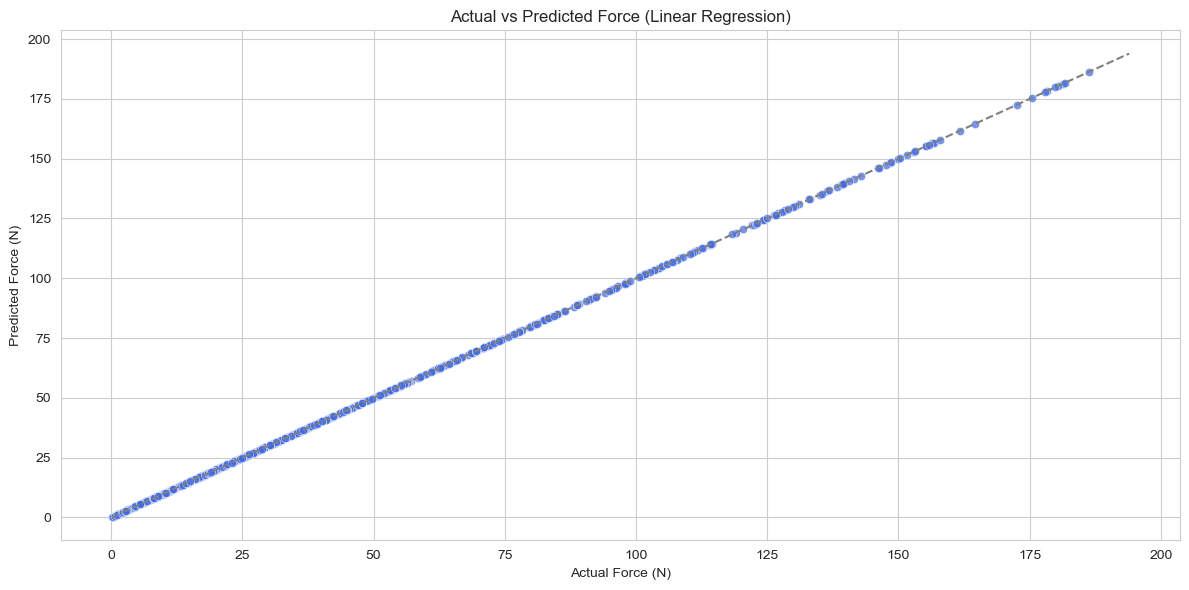

In [5]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color="royalblue")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='gray')
plt.xlabel("Actual Force (N)")
plt.ylabel("Predicted Force (N)")
plt.title("Actual vs Predicted Force (Linear Regression)")
plt.tight_layout()
plt.show()


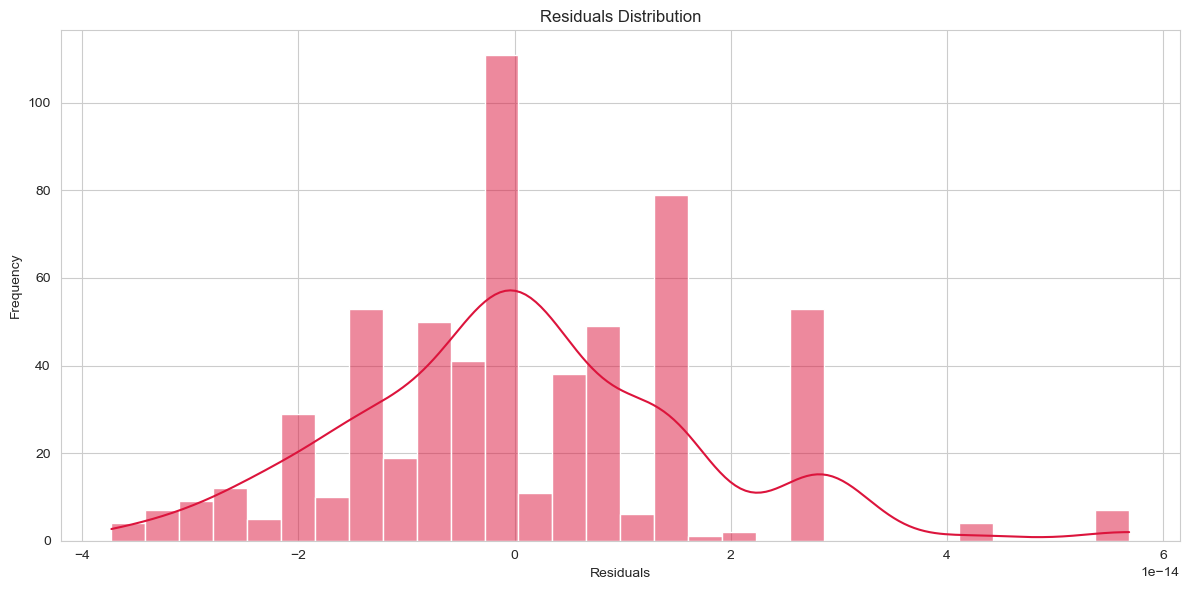

In [6]:
residuals = y_test - y_pred

plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True, color="crimson", bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [7]:
print("Symbolic Regression Formula:\n")
print(symbolic_equation)

Symbolic Regression Formula:

mul(X1, X0)


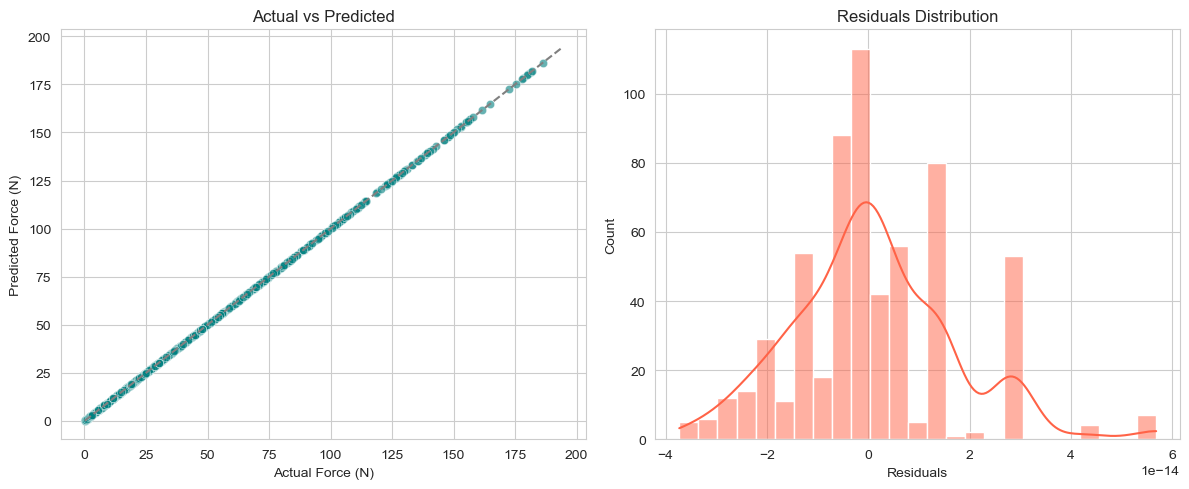

Final visualizations saved to results/figures/


In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="teal", ax=axes[0])
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], '--', color='gray')
axes[0].set_xlabel("Actual Force (N)")
axes[0].set_ylabel("Predicted Force (N)")
axes[0].set_title("Actual vs Predicted")

sns.histplot(residuals, kde=True, color="tomato", bins=25, ax=axes[1])
axes[1].set_title("Residuals Distribution")
axes[1].set_xlabel("Residuals")

plt.tight_layout()
plt.savefig("../../results/figures/newtons_law_final_visualization.png")
plt.show()
print("Final visualizations saved to results/figures/")